<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FUN_Ocean_Decade%2FChallenge02_ecosystems_and_biodiversity%2FMarine_heatwaves_intensification_threatens_coral_reef_health.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UN_Ocean_Decade/Challenge02_ecosystems_and_biodiversity/Marine_heatwaves_intensification_threatens_coral_reef_health.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** to download from WEkEO
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using SLSTR data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SLSTR" target="_blank">Learn SLSTR (EUMETSAT Gitlab)</a>**

For more contextual information, users should refer to the following case study where the image we generate here is published:
- **UPDATE**

</div>
<hr>

# Sea surface temperature anomlies in the Northern Atlantic and Mediterranean Sea in 2023
<font color="#138D75">**UN Ocean Decade Challenge 2: Protect and restore ecosystems and biodiversity**</font>

### Data used

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level-2 | EO:EUM:DAT:0412 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SL_2_SST?query=SLSTR&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SL_2_WST___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_2_WST___&initial=1" target="_blank">link</a> |
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* download SLSTR Level-2 SST products from the EUMETSAT Data Store
* spatially plot SLSTR data for the Great Barrier Reef (GBR) region
* download OSTIA reprocessed SST data from WEkEO using the harmonised data access (HDA) API
* make a "climate stripes" plot over the GBR region
* check for marine heat waves in the GBR region

### Outline

Concurrent with the past century's persistent warming of global oceans, marine heatwaves (periods of extreme regional ocean warming) have become more frequent and more extreme (Laufkötter et al., 2020). They occur in many areas around the world, from the Pacific Ocean to the Atlantic Ocean to the Mediterranean Sea and threaten marine biodiversity and its ecosystems (Smale et al., 2019). One particular ecosystem impacted by marine heatwaves, are coral reefs. These heatwaves can, for example, cause coral bleaching, coral disease outbreaks, and/or algae blooms (Roberts et al., 2019). Although coral can survive these so-called bleaching events, they become more stressed, more susceptible to diseases, and, on the long-term, subject to mortality (NOAA, 2021).

In this notebook we will work through an example of how you can access near-real-time data to view current SST in a region that is often affected by marine heatwaves. We will then look at this area in a long term context using a reprocessed time series, to see how the current situation compares to historical marine heat wave episodes.

This Jupyter Notebook builds on the **<a href="https://www.eumetsat.int/Marine-heatwave-intensification-threatens-coral-reef-health" target="_blank">Marine heatwave intensification threatens coral reef health</a>** case study, and will replicate the figures 3, 5 and 6 using Level-2 data from the Copernicus Sentinel-3 SLSTR sensor and Level-4 data from the Level-4 global OSTIA record. You can find more information on these in the links above.

As part of the **<a href="https://www.oceandecade.org/" target="_blank">United Nations Ocean Decade</a>**, ten specific challenges are being addressed. This work, and the data underlying it, support "Challenge 2 - Protect and restore ecosystems and biodiversity". Data on marine heatwaves can help characterise the stressors facing marine ecosystems under climate changes, and contribute to decision making to protect, manage and restore those affected.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Acquiring SLSTR data via the WEkEO HDA adaptor](#section1)
 1. [Plotting SLSTR data spatially](#section2)
 1. [Downloading OSTIA SST data from the Copernicus Marine Service (CMEMS)](#section3)
 1. [Preparing the OSTIA data](#section4)
 1. [Making SST-based climate stripes](#section5)
 1. [Testing for marine heatwaves](#section6)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import cartopy.crs as ccrs      # a library that supports mapping and projection
import cartopy.feature as ccf   # a cartopy extension that support adding features, e.g. coastlines
import datetime                 # a library that allows us to work with dates and times
import glob                     # a package that helps with file searching
import matplotlib.pyplot as plt # a library the provides plotting capability
from matplotlib import gridspec # a library the provides plotting capability
import numpy as np              # a library that lets us work with arrays; we import this with a new name "np"
import os                       # a library that allows us access to basic operating system commands
import xarray as xr             # a powerful library that helps us work efficiently with multi-dimensional arrays
import zipfile                  # a library that allows us to unzip zip-files.
import eumartools               # a library that helps us work with Sentinel-3 data
import hda                      # a library to help us access CMEMS data
import warnings                 # a library the helps us to manage warnings
import eumdac                   # a tool that helps us download via the eumetsat/data-store
import json                     # a library that helps us make JSON format files
import shutil
import zipfile      # a library that allows us to unzip zip-files.

#import leafmap

from scipy.interpolate import griddata

warnings.filterwarnings("ignore")

os.environ["CARTOPY_USER_BACKGROUNDS"] = "/Users/benloveday/Desktop/BG/"

In [2]:
def set_plot():
    # setup plot
    gs = gridspec.GridSpec(3, 1, height_ratios=[10, 1, 1])
    gs.update(wspace=0.01, hspace=0.01)

    return gs

def embellish_plot():

    # add some map final embelishments
    axes_m.coastlines(resolution='50m', color='black', linewidth=0.25)
    
    try:
        axes_m.background_img(name='natearth', resolution='high')
    except:
        axes_m.add_feature(ccf.NaturalEarthFeature('raster', 'HYP_HR_SR', '10m',
                           edgecolor='k', linewidth=0.25, facecolor=ccf.COLORS['land']))

    #g1 = axes_m.gridlines(draw_labels = True, linestyle="--", color="0.5", linewidth=0.25)
    #g1.top_labels = g1.right_labels = False
    #g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Selecting SST data
[Back to top](#TOC-TOP)

</div>

<figure>
  <img src='../../../img/GHRSST_SST_def.png' width='50%'/>
  <figcaption>Figure 1: GHRSST SST definitions.</figcaption>
</figure>

Caveats:
* not CDR
* operational products not same quality as reprocessing
* diurnal warming


<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Acquiring our selected SST data
[Back to top](#TOC-TOP)

</div>

In [3]:
download_data = False
download_granules = False

In [4]:
# Create a download directory for our OLCI products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

In [5]:
# ROI
# W, S, E, N
region = [-90.0, 30.0, 45.0, 75.0]

# climatology
start_year = 1982
end_year = 2011
month = 6
day = 26
clim_id = "EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011:METOFFICE-GLO-SST-L4-REP-OBS-SST_202003"

# latest NRT product
oper_id = "EO:MO:DAT:SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001:METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2"

# get operational year
if datetime.datetime(datetime.datetime.now().year, month, day) > datetime.datetime.now():
    print('Chosen day is in the future, getting NRT data from last year')
    oper_year = datetime.datetime.now().year - 1
else:
    print('Chosen day is in the past, getting NRT data from this year')
    oper_year = datetime.datetime.now().year 

# combine years
all_years = [range(start_year,end_year+1), [oper_year]]
all_years = [item for sublist in all_years for item in sublist]

Chosen day is in the past, getting NRT data from this year


In [6]:
c = hda.Client()

In [7]:
query = {
  "datasetId": "",
  "boundingBoxValues": [
    {
      "name": "bbox",
      "bbox": region
    }
  ],
  "dateRangeSelectValues": [
    {
      "name": "time",
      "start": "",
      "end": ""
    }
  ],
  "multiStringSelectValues": [
    {
      "name": "variables",
      "value": [
        "analysed_sst", "lat", "lon"
      ]
    }
  ]
}

Next cell can take some time

In [8]:
%%capture
clim_files = []
oper_files = []
for ii in all_years:
    print(f"---\nExtracting data for {str(ii)}\n---")
    extraction_date = f"{ii}-{str(month).zfill(2)}-{str(day).zfill(2)}T00:00:00.000Z"
    formatted_month = datetime.datetime.strptime(extraction_date, "%Y-%m-%dT%H:%M:%S.000Z")

    if ii == oper_year:
        query["datasetId"] = oper_id
        output_file = os.path.join(download_dir, f"OPER_OSTIA_SST_{extraction_date.split('T')[0]}.nc")
        oper_files.append(output_file)
    else:
        query["datasetId"] = clim_id
        output_file = os.path.join(download_dir, f"CLIM_OSTIA_SST_{extraction_date.split('T')[0]}.nc")
        clim_files.append(output_file)

    query["dateRangeSelectValues"][0]["start"] = extraction_date
    query["dateRangeSelectValues"][0]["end"] = extraction_date

    if download_data:
        matches = c.search(query)
        for match in matches.results:
            filename = match["filename"]

        matches.download()
        if os.path.exists(output_file):
            os.remove(output_file)

        os.rename(os.path.join(os.getcwd(), filename), output_file)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Preparing a SST climatology
[Back to top](#TOC-TOP)

</div>

We will do a bit or preprocessing on the OSTIA data to make it easier to use for our purposes. We begin by opening the data, then calculate spatial averages, annual values, and then, from these an SST anomaly. The `xarray` library allows us to open all the downloaded files at once!

In [15]:
SST_clim_data = xr.open_mfdataset(clim_files, combine='nested', concat_dim="time")
SST_clim_data_subset = SST_clim_data.sel(lat=slice(region[1], region[3]), lon=slice(region[0], region[2]))
#SST_clim = SST_clim_data_subset["analysed_sst"].mean(dim='time')
SST_clim = SST_clim_data["analysed_sst"].mean(dim='time')

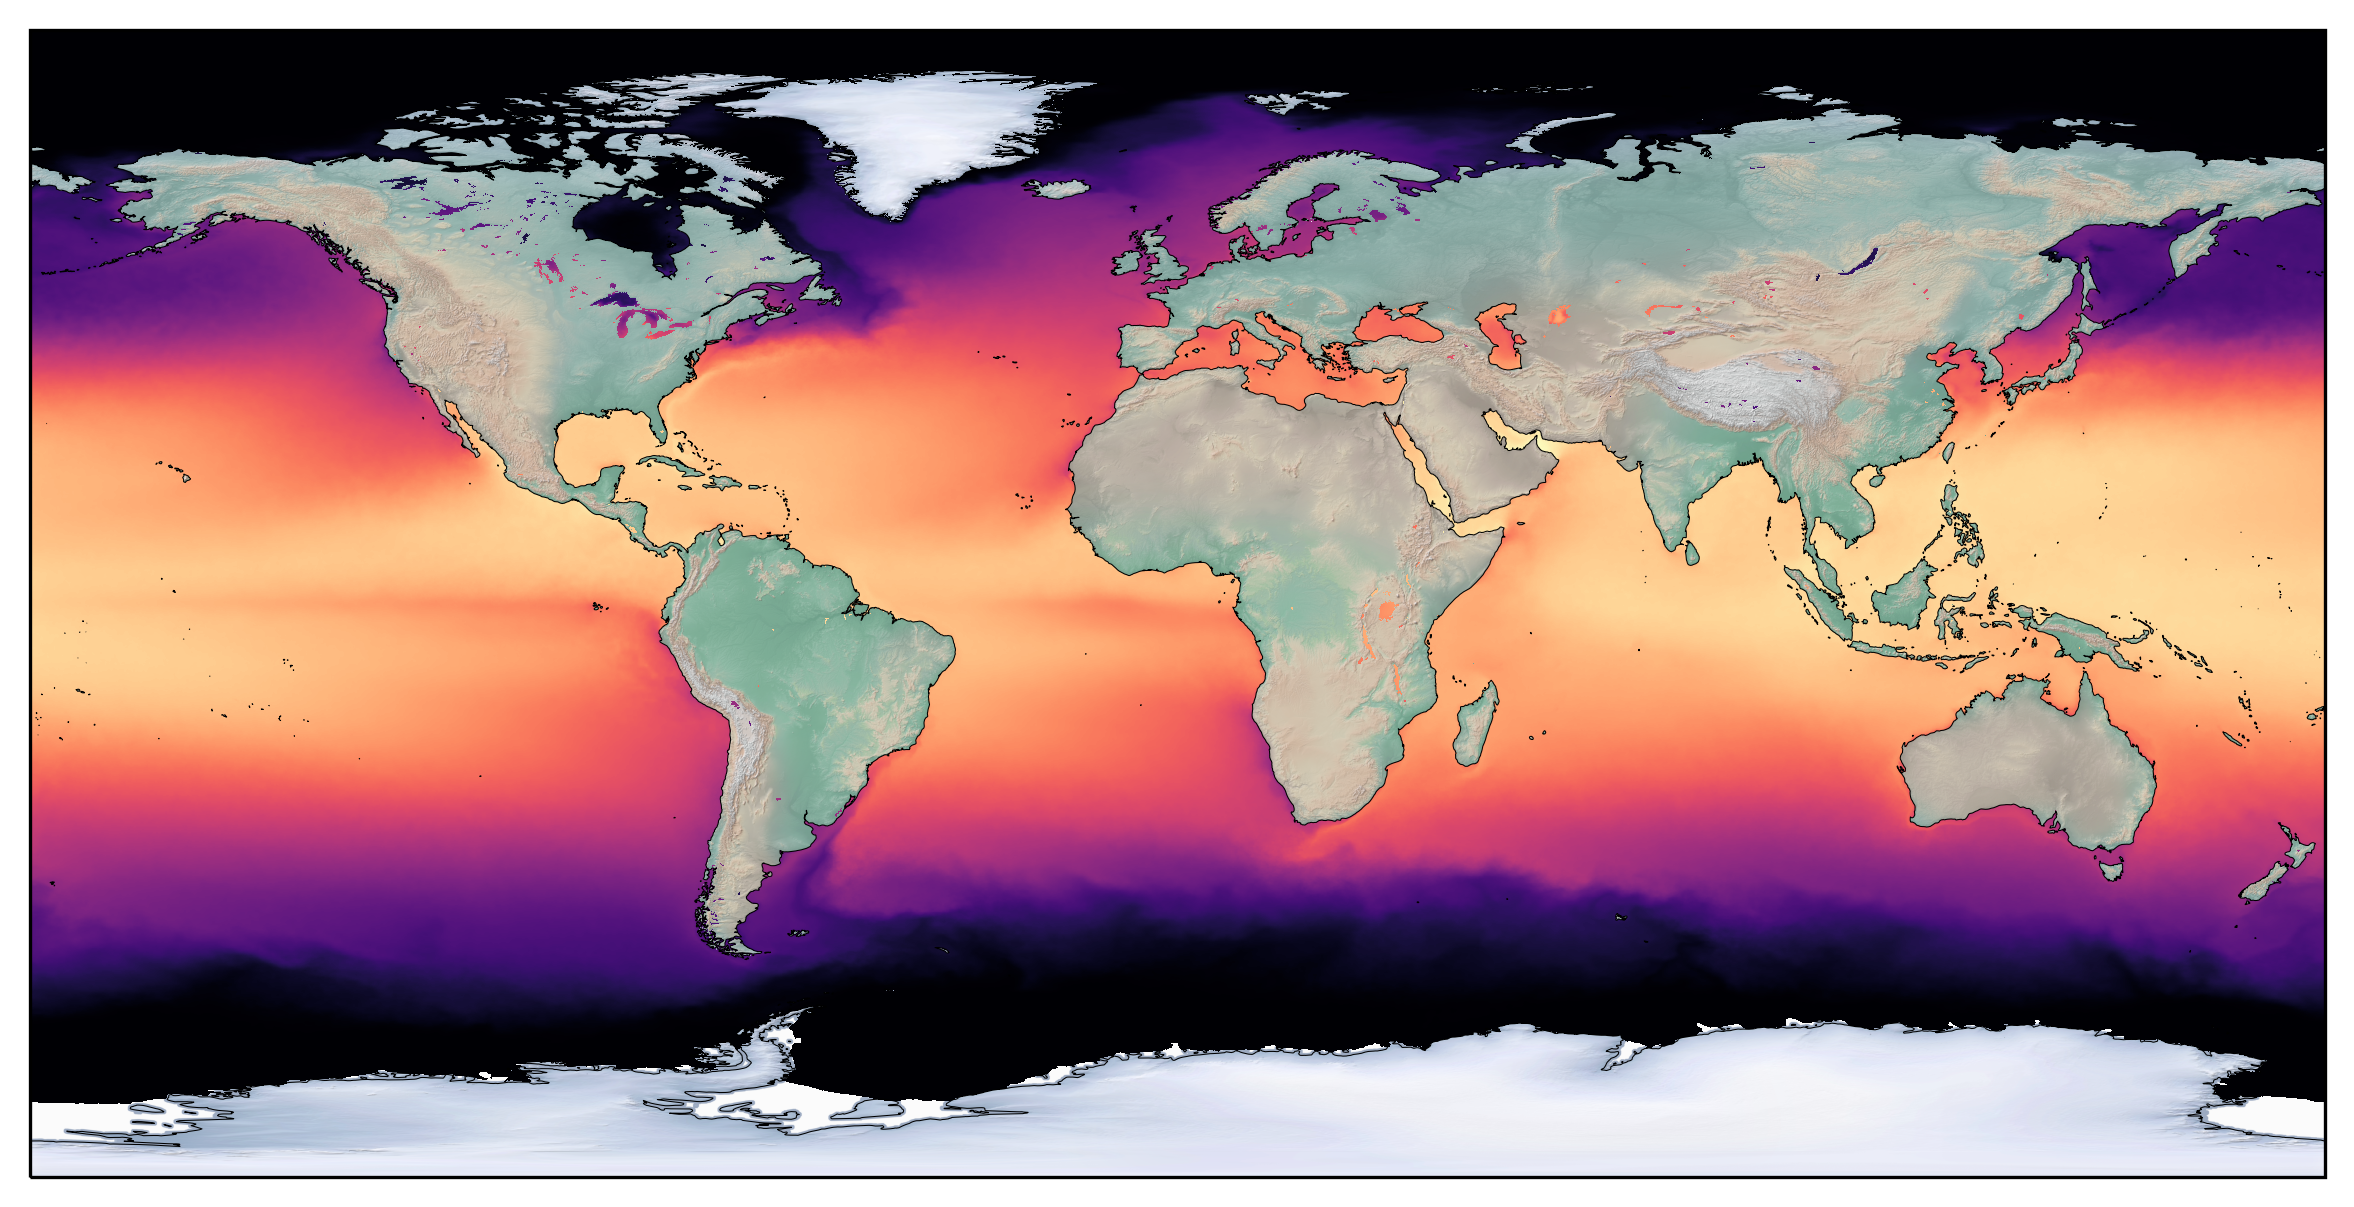

In [17]:
# setup figure
fig = plt.figure(figsize=(16, 6), dpi=300)
plt.rc('font', size=12)

gs = set_plot()

# plot
axes_m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
#axes_m.set_extent([region[0], region[2], region[1], region[3]], crs=ccrs.PlateCarree())
axes_m.set_global()
p1 = axes_m.pcolormesh(SST_clim_data["lon"], SST_clim_data["lat"],
                       SST_clim - 273.15, cmap="magma", transform=ccrs.PlateCarree())

embellish_plot()

# colorbar
#axes_c = plt.subplot(gs[2,0])
#cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
#clabel = f"OSTIA foundation SST climatology ({start_year}:{end_year}) for {day} {formatted_month.strftime('%B')}"
#cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("OSTIA_clim.png", bbox_inches='tight')

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Calculating anomalies using level 4 data
[Back to top](#TOC-TOP)

</div>

In [18]:
SST_oper_data = xr.open_mfdataset(oper_files)
SST_oper_data_subset = SST_oper_data.sel(lat=slice(region[1], region[3]), lon=slice(region[0], region[2]))
SST_anomaly = np.squeeze(SST_oper_data["analysed_sst"]) - SST_clim

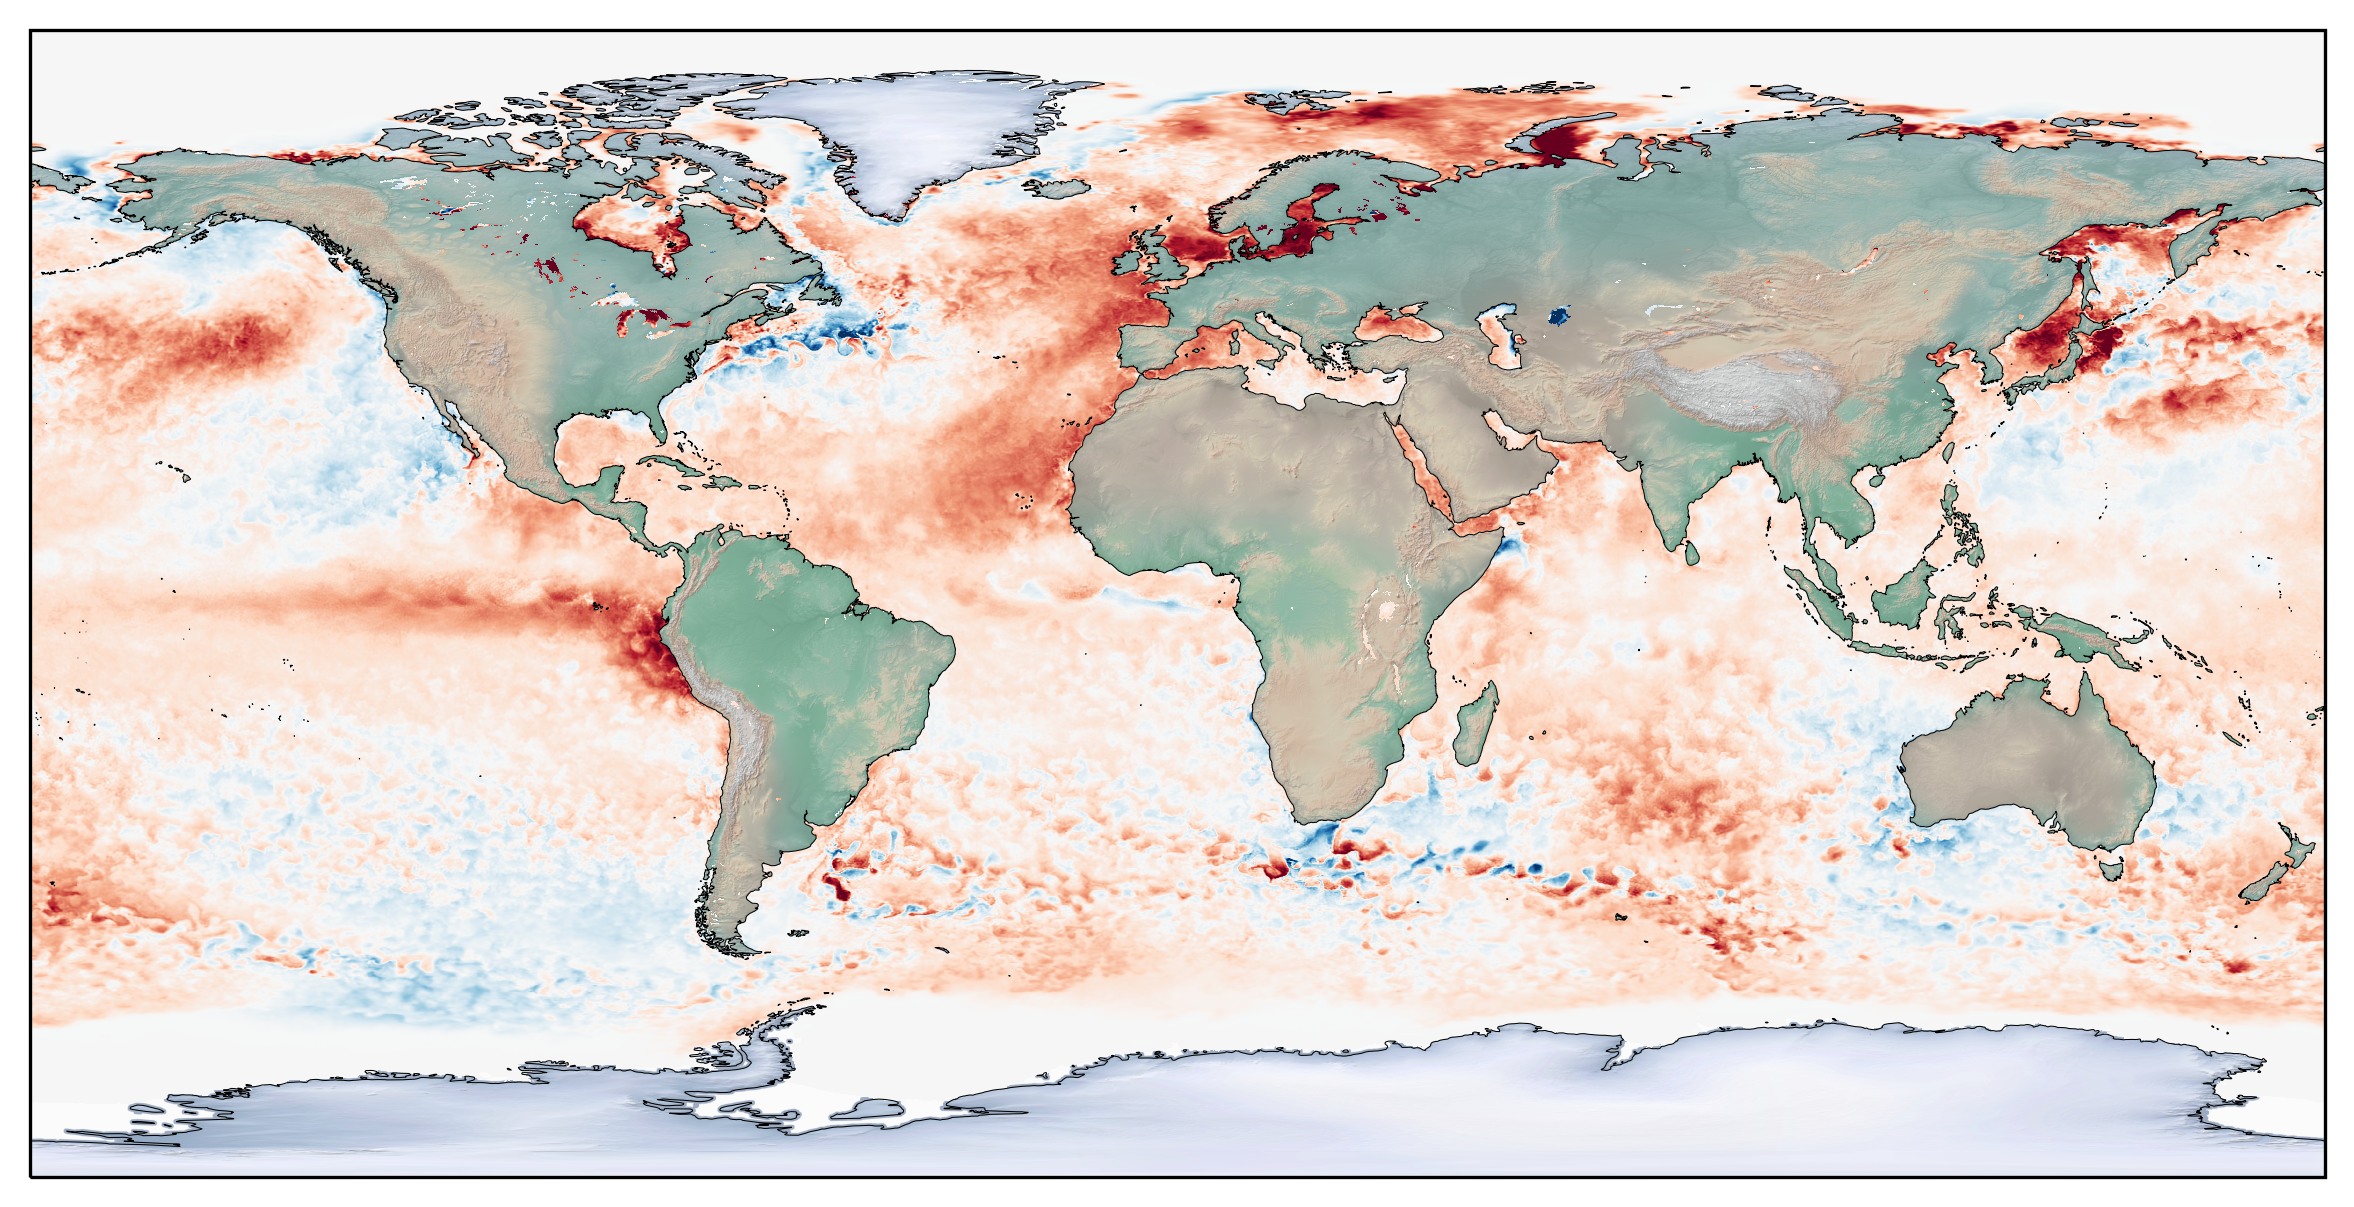

In [19]:
# setup figure
fig = plt.figure(figsize=(16, 6), dpi=300)
plt.rc('font', size=12)

gs = set_plot()

# plot
axes_m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
#axes_m.set_extent([region[0], region[2], region[1], region[3]], crs=ccrs.PlateCarree())
axes_m.set_global()
p1 = axes_m.pcolormesh(SST_clim_data["lon"], SST_clim_data["lat"], SST_anomaly, cmap="RdBu_r",
                       transform=ccrs.PlateCarree(), vmin=-5, vmax=5)

embellish_plot()

# colorbar
#axes_c = plt.subplot(gs[2,0])
#cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
#clabel = f"OSTIA Foundation SST anomaly for {day} {formatted_month.strftime('%B')} {oper_year}"
#cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("OSTIA_anom.png", bbox_inches='tight')

Caveats: 
* OSTIA climatology is reprocessed, but not a CDR
* OSTIA NRT is not the same quality as the reprocessed data

We should take some care when considering this (but it look reeeeeeeaaaallly bad!)

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Calculating anomalies using level 2 data
[Back to top](#TOC-TOP)

</div>

In [ ]:
# W S E N
region_small = [-10, 30, 45, 46]

In [ ]:
# get SLSTR granules
# load credentials
with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
    credentials = json.load(json_file)
    token = eumdac.AccessToken((credentials['consumer_key'], credentials['consumer_secret']))
    print(f"This token '{token}' expires {token.expiration}")

# create data store object
datastore = eumdac.DataStore(token)

collectionID = 'EO:EUM:DAT:0412'

# space/time filter the collection for products
selected_collection = datastore.get_collection(collectionID)
start = datetime.datetime(2023, 6, 26, 18, 0, 0)
end = datetime.datetime(2023, 6, 27, 3, 0, 0)
roi = [[region_small[0], region_small[1]],
       [region_small[0], region_small[3]],
       [region_small[2], region_small[3]],
       [region_small[2], region_small[1]],
       [region_small[0], region_small[1]]]
    
if download_granules:

    products = selected_collection.search(
        geo='POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in roi])),
        dtstart=start, 
        dtend=end,
        timeliness = 'NR', 
        orbitdir= 'ASCENDING')

    for product in products:
        with product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
            print(f'Downloading {fsrc.name}')
            shutil.copyfileobj(fsrc, fdst)
            print(f'Download of product {fsrc.name} finished.')

            try:
                with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
                    for file in zip_ref.namelist():
                        if file.startswith(str(product)):
                            zip_ref.extract(file, download_dir)
                    print(f'Unzipping of product {product} finished.')
                os.remove(fdst.name)
            except:
                print(f">>>>>>>>>>>>>>> bad zip {fdst.name}")

In [ ]:
# setup figure
fig = plt.figure(figsize=(16, 6), dpi=300)
plt.rc('font', size=12)

gs = set_plot()

# plot
axes_m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
axes_m.set_extent([region_small[0], region_small[2], region_small[1], region_small[3]], crs=ccrs.PlateCarree())
p1 = axes_m.pcolormesh(SST_clim_data_subset["lon"], SST_clim_data_subset["lat"], SST_anomaly, cmap="RdBu_r",
                       transform=ccrs.PlateCarree(), vmin=-5, vmax=5)

embellish_plot()

# colorbar
axes_c = plt.subplot(gs[2,0])
cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
clabel = f"OSTIA Foundation SST anomaly for {day} {formatted_month.strftime('%B')} {oper_year}"
cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("OSTIA_anom_med.png", bbox_inches='tight')

In [ ]:
# read SLSTR granules:
files = glob.glob("./products/**/*.nc")

In [ ]:
LON, LAT = np.meshgrid(SST_clim_data_subset["lon"], SST_clim_data_subset["lat"])

# setup figure
fig = plt.figure(figsize=(16, 6), dpi=300)
plt.rc('font', size=12)

gs = set_plot()

axes_m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
axes_m.set_extent([region_small[0], region_small[2], region_small[1], region_small[3]], crs=ccrs.PlateCarree())

# blank out the background
p1 = axes_m.pcolormesh(SST_clim_data_subset["lon"], SST_clim_data_subset["lat"], SST_anomaly*0, cmap="RdBu_r",
                       transform=ccrs.PlateCarree(), vmin=-5, vmax=5)
    
count = 0
for file in files:
    count = count + 1
    print(f"Processing granule {count} of {len(files)}")
    SST_granule = xr.open_mfdataset(file)
    
    # interp clim to granule: dodgy!
    SST_clim_interp = griddata((LON.ravel(), LAT.ravel()),
                               np.array(SST_clim).ravel(),
                               (np.array(SST_granule["lon"]).ravel(), np.array(SST_granule["lat"]).ravel()),
                               method="nearest").reshape(1200, 1500)
    
    SST = np.squeeze(np.array(SST_granule["sea_surface_temperature"] + SST_granule["sses_bias"]))
    QC = np.squeeze(np.array(SST_granule["quality_level"]))
    SST[QC < 5] = np.nan
    p1 = plt.pcolormesh(SST_granule["lon"], SST_granule["lat"], SST - SST_clim_interp, cmap="RdBu_r", vmin = -5, vmax = 5)
    SST_granule.close()

embellish_plot()

# colorbar
#axes_c = plt.subplot(gs[2,0])
#cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
#clabel = f"SLSTR night-time SST anomaly for {day} {formatted_month.strftime('%B')} {oper_year}"
#cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("SLSTR_anom_med_no_embellish.png", bbox_inches='tight')

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>